Train on 89 samples, validate on 30 samples
Epoch 1/100
89/89 [==============================] - 0s 2ms/step - loss: 1.2355 - acc: 0.2921 - val_loss: 1.0649 - val_acc: 0.5000
Epoch 2/100
89/89 [==============================] - 0s 403us/step - loss: 1.1168 - acc: 0.2921 - val_loss: 1.0261 - val_acc: 0.5000
Epoch 3/100
89/89 [==============================] - 0s 202us/step - loss: 1.0378 - acc: 0.3146 - val_loss: 0.9880 - val_acc: 0.6333
Epoch 4/100
89/89 [==============================] - 0s 202us/step - loss: 0.9889 - acc: 0.6404 - val_loss: 0.9412 - val_acc: 0.7333
Epoch 5/100
89/89 [==============================] - 0s 247us/step - loss: 0.9390 - acc: 0.6404 - val_loss: 0.8708 - val_acc: 0.7333
Epoch 6/100
89/89 [==============================] - 0s 224us/step - loss: 0.8868 - acc: 0.6180 - val_loss: 0.7999 - val_acc: 0.7333
Epoch 7/100
89/89 [==============================] - 0s 213us/step - loss: 0.8373 - acc: 0.6180 - val_loss: 0.7076 - val_acc: 0.7333
Epoch 8/100
89/89 [========

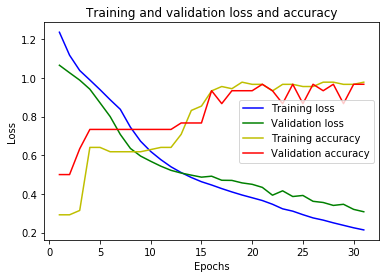

In [74]:
#0.사용할 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


#랜덤시드 고정시키기
np.random.seed(5)

#1.데이터 준비하기
dataset = pd.read_csv('iris3.csv')
dataset = dataset.values
np.random.shuffle(dataset)

#2.데이터셋 분할
X = dataset[:,:4]
Y = dataset[:,4]

def division(data):
    train_size = int(len(data)*0.6)
    val_size = int(len(data)*0.8)
    data_train = data[0:train_size]
    data_val = data[train_size:val_size]
    data_test = data[val_size:len(data)]
    return data_train, data_val, data_test

X_train, X_val, X_test = division(X)
Y_train, Y_val, Y_test = division(Y)

Y_test_var = Y_test

#2.1. One-hot encoding
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

#3.모델 구성하기
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

#3.1. 모델 아키텍쳐 살펴보기
# model.summary()

#4.모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

#5.모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_acc',
    patience=10,
    ),
#     ModelCheckpoint(
#     filepath='multi_model.h5',
#     monitor='val_loss',
#     save_best_only=True,
#     )
]

hist = model.fit(X_train, Y_train, epochs=100, batch_size=10, callbacks=callbacks_list, validation_data=(X_val, Y_val))

#6.모델 평가하기
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

#6.1. Epoch, loss and acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training and validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#7.예측하기
Y_predict = model.predict(X_test)
# Y_predict

#7.1. argmax
result = []
for i in range(len(Y_predict)):
    label = np.argmax(Y_predict[i])
    result.append(label)

df = pd.DataFrame(result)
df.insert(0,'Y_test',Y_test_var)
df = df.rename(columns = {0: 'Y_predict'})
df.to_csv("predict_multinomial.csv", index=False)   